In [1]:
import pandas as pd
import numpy as np
import itertools as it

import pickle as pcl

# from scipy.spatial.distance import cdist

import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

from palettable.tableau import GreenOrange_12
cmap = GreenOrange_12.hex_colors

from collections import Counter

from mpl_toolkits.mplot3d import Axes3D

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
import hightolowz
import protocluster_completeness_purity 

In [4]:
from scipy.optimize import curve_fit

In [5]:
L = 480.279

Load data

In [6]:
reload(protocluster_completeness_purity)

<module 'protocluster_completeness_purity' from 'protocluster_completeness_purity.pyc'>

In [7]:
# gals_z2p07_mstar = pd.read_csv('data/r200/henriques2015a_z2p07_mstar_r200.csv', skiprows=114, skipfooter=1, engine='python')
# gals_z3p10_mstar = pd.read_csv('data/r200/henriques2015a_z3p10_mstar_r200.csv', skiprows=114, skipfooter=1, engine='python')
gals_z3p95_mstar = pd.read_csv('data/r200/henriques2015a_z3p95_mstar_r200.csv', skiprows=114, skipfooter=1, engine='python')

In [8]:
# cstats_2p07_mstar = protocluster_completeness_purity.cluster_stats(gals_z2p07_mstar, L=L)
# cstats_3p10_mstar = protocluster_completeness_purity.cluster_stats(gals_z3p10_mstar, L=L)
cstats_3p95_mstar = protocluster_completeness_purity.cluster_stats(gals_z3p95_mstar, L=L)

N Clusters:  2136
Building periodic KDtree...
Calculating cluster properties...


In [5]:
# gals_z2p07_sfr = pd.read_csv('data/r200/henriques2015a_z2p07_sfr_r200.csv', skiprows=114, skipfooter=1, engine='python')

In [249]:
# cstats_2p07_sfr = protocluster_completeness_purity.cluster_stats(gals_z2p07_sfr, L=L)

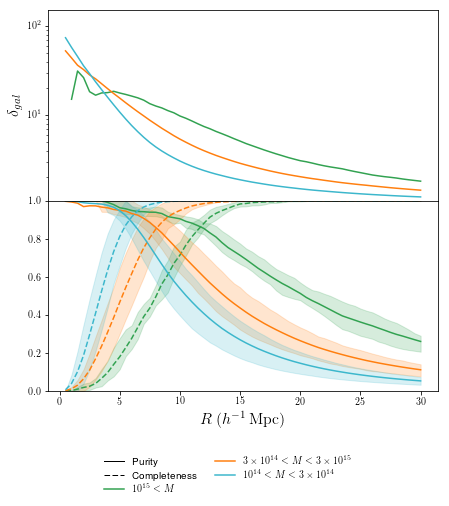

In [11]:
fig = plt.figure(figsize=(7,7))

gs = gridspec.GridSpec(2, 1)

gs.update(hspace=0, wspace=0) #bottom = 0.57, top = 1, 

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

rangex = [float(x)/2 for x in range(61)[1:]]

#for i, cstats in enumerate([cstats_2p07_mstar, cstats_3p10_mstar, cstats_3p95_mstar]):
i = 0
cstats = cstats_3p95_mstar

mask_A = np.array(cstats['clusters']['z0_central_mcrit200']) > 1e5
mask_B = (np.array(cstats['clusters']['z0_central_mcrit200']) > 3e4) & (np.array(cstats['clusters']['z0_central_mcrit200']) <= 1e5)
mask_C = (np.array(cstats['clusters']['z0_central_mcrit200']) > 1e4) & (np.array(cstats['clusters']['z0_central_mcrit200']) <= 3e4)
    
for i, mask in enumerate([mask_A, mask_B, mask_C]):
    
    ax1.semilogy(rangex, np.nanmean([x[2] for x in np.array(cstats['cstats'])[mask]],axis=0) + 1,
                 c=cmap[i*2], ls='solid')
    
#     dgal_range = np.array([np.percentile(y, [84,16]) for y in np.vstack([x[2] for x in np.array(cstats['cstats'])[mask]]).T])
#     ax1.fill_between(rangex, dgal_range[:,0], dgal_range[:,1], alpha=0.2, color=cmap[i*2])
    
    completeness = np.array([np.percentile(y, [84,16]) for y in np.vstack([x[0] for x in np.array(cstats['cstats'])[mask]]).T])
    purity = np.array([np.percentile(y, [84,16]) for y in np.vstack([x[1] for x in np.array(cstats['cstats'])[mask]]).T])

    ax2.fill_between(rangex, completeness[:,0], completeness[:,1], alpha=0.2, color=cmap[i*2])

    ax2.fill_between(rangex, purity[:,0], purity[:,1], alpha=0.2, color=cmap[i*2])

    ax2.plot(rangex, np.mean([x[0] for x in np.array(cstats['cstats'])[mask]], axis=0), 
             c=cmap[i*2], linestyle='dashed')
    
    ax2.plot(rangex, np.mean([x[1] for x in np.array(cstats['cstats'])[mask]], axis=0), c=cmap[i*2])


ax2.set_xlabel('$R \;(h^{-1} \,\mathrm{Mpc})$', size=16)
ax1.set_ylabel('$\delta_{gal}$', size=16)

ax2.set_ylim(0, 1)
ax1.set_ylim(1.1, 150)

line_z = []
for i in range(3):
    line_z.append(plt.Line2D((0,1),(0,0), color=cmap[i*2], linestyle='solid'))

line_comp = plt.Line2D((0,1.5),(0,0), color='black', linestyle='solid', linewidth=1)
line_puri = plt.Line2D((0,1.5),(0,0), color='black', linestyle='dashed', linewidth=1)

ax2.legend(handles=[line_comp, line_puri] + [line for line in line_z], 
           labels=['Purity', 'Completeness','$10^{15} < M$',
                   '$3 \\times 10^{14} < M < 3 \\times 10^{15}$','$10^{14} < M < 3 \\times 10^{14}$'],
           prop={'size':10}, frameon=False, bbox_to_anchor=(0.8, -0.3), ncol=2)

# plt.savefig("../papers/hightolowz/images/compur_masscomp_dgal.png", bbox_inches='tight', dpi=300)

### single scale

In [ ]:
cstats = cstats_3p95_sfr

[  5.60070158   1.           1.         -76.44362868]


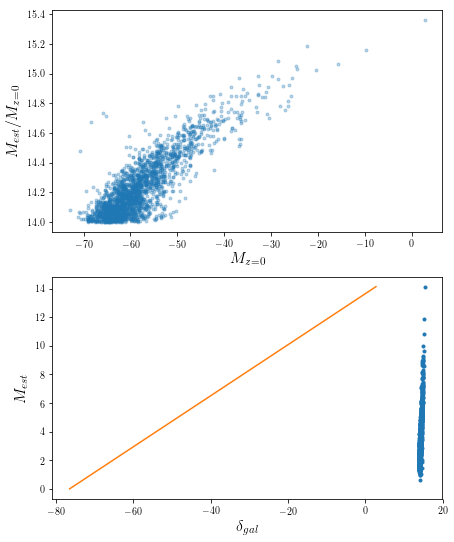

In [430]:
def func(x, a, b, c, C):
    # return a * np.exp(c*x) + b*(x+1)**0.75 + C #+ b*x
    # return a*np.log(b*(x+1)) + C #+ c*x + C
    # return a*(x+1)**2 + b*x + C #+ c*x + C
    return a*x + C #+ c*x + C


y = np.log10(np.array(cstats['clusters']['z0_central_mcrit200']) * 1e10)
x = np.array([x[2][14] for x in cstats['cstats']]).T

popt, pcov = curve_fit(func, y, x)
print popt

fig = plt.figure(figsize=(7,9))

gs = gridspec.GridSpec(2, 1)
#gs.update(hspace=0.2, wspace=0)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

ax1.plot(func(x, popt[0], popt[1], popt[2], popt[3]), y, '.', alpha=0.3)

ax2.plot(y, x, '.')
ax2.plot(func(np.linspace(0, x.max(), 50), popt[0], popt[1], popt[2], popt[3]), np.linspace(0, x.max(), 50))

ax1.set_ylabel('$M_{est} / M_{z=0}$', size=16)
ax1.set_xlabel('$M_{z=0}$', size=16)

ax2.set_ylabel('$M_{est}$', size=16)
ax2.set_xlabel('$\delta_{gal}$', size=16)

### two scales

[ -4.91779476e-14   1.00000271e+00   3.76054109e-03  -8.72210593e-01
   2.03417563e-02   1.67028963e-01   1.38021269e+01]


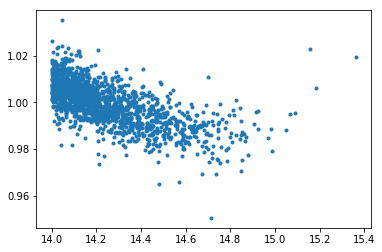

In [387]:
def func(x, a, b, c, d, e, f, C):
#     return a*np.exp(1+x[0]) + b*np.exp(1 + x[1]) + c*(x[1] * x[0]) + C
#     return a*(1+x[0]) + b*(1 + x[1]) + C
#     return a*np.exp(b*x[0]) + c*np.exp(d*x[1]) + e*x[0] + C
    return a*np.exp(b*x[0]) + c*np.exp(d*x[1]) + e*x[0] + f*x[1] + C 

y = np.log10(np.array(cstats['clusters']['z0_central_mcrit200']) * 1e10)
x = np.array([[x[2][8], x[2][20]] for x in cstats['cstats']]).T

popt, pcov = curve_fit(func, x, y)
print popt

plt.plot(y, func(x, popt[0], popt[1], popt[2],popt[3],popt[4], popt[5], popt[6]) / y, '.')

(0.9, 1.1)

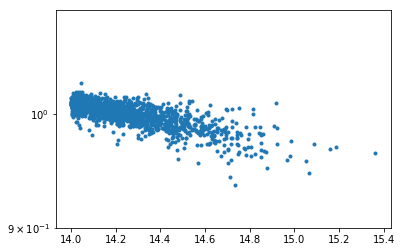

In [369]:
plt.semilogy(y, func(x, popt[0], popt[1], popt[2],popt[3],popt[4], popt[5], popt[6]) / y, '.')
plt.ylim(0.9,1.1)

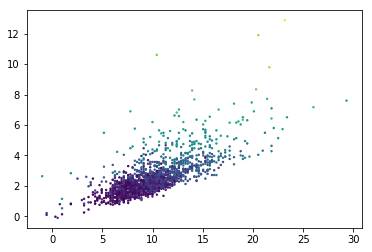

In [370]:
plt.scatter(x[0], x[1], c=y, s=2)

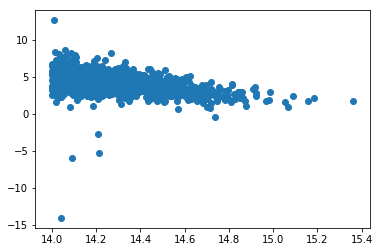

In [371]:
plt.scatter(y, x[0] / x[1])

### three scales

[ -3.82023862e-10   9.87455996e-01   2.98680938e-02   3.92494693e-01
  -2.57116311e-03  -6.48767930e-02   5.20125074e-02   1.24016970e-01
   1.00000000e+00   1.00000000e+00   1.35514369e+01]
[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]


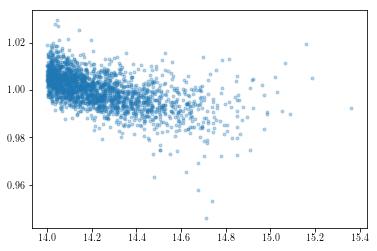

In [435]:
def func(x, a, b, c, d, e, f, g, h, i, j, C):
    # return a*x[0] + b*x[1] + c*x[2] + d*x[0]*x[1] + C
    return a*np.exp(b*x[0]) +g*(1+x[0]) + c*np.exp(d*x[1]) +h*(1+x[1]) + f*x[2] + e*x[0]*x[1] + C

y = np.log10(np.array(cstats['clusters']['z0_central_mcrit200']) * 1e10)
x = np.array([[n[2][10], n[2][20], n[2][30]] for n in cstats['cstats']]).T

popt, pcov = curve_fit(func, x, y)
print popt

perr = np.sqrt(np.diag(pcov))
print perr
x[0]
plt.plot(y, func(x, popt[0], popt[1], popt[2], popt[3], popt[4],
                popt[5],popt[6],popt[7],popt[8],popt[9], popt[10]) / y, '.', alpha=0.3)

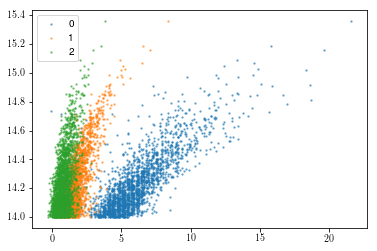

In [434]:
plt.scatter(x[0], y, s=2, alpha=0.5, label='0')
plt.scatter(x[1], y, s=2, alpha=0.5, label='1')
plt.scatter(x[2], y, s=2, alpha=0.5, label='2')
plt.legend()

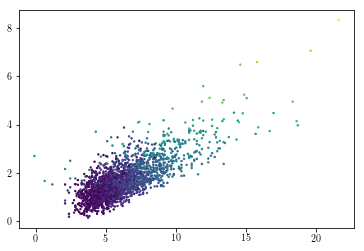

In [439]:
plt.scatter(x[0], x[1], c=y, s=2)

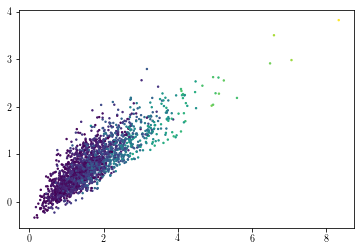

In [440]:
plt.scatter(x[1], x[2], c=y, s=2)

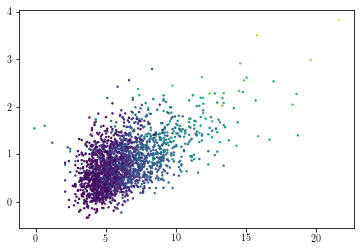

In [441]:
plt.scatter(x[0], x[2], c=y, s=2)